# Midterm 3 - Assignment 2

## Import all the necessary modules


In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, BatchNormalization
from keras import regularizers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# from main import build_model, run_model, adversary_pattern, attack_pattern, adversary_pattern, add_noise_set

## Load and normalize the dataset

In [ ]:
(tr_set, tr_labels), (ts_set, ts_labels) = cifar10.load_data()
tr_set = tr_set.astype("float32") / 255
ts_set = ts_set.astype("float32") / 255
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
tr_labels_one_hot = np_utils.to_categorical(tr_labels)
ts_labels_one_hot = np_utils.to_categorical(ts_labels)

## Build the model

In [ ]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation="relu", kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation="relu", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation="relu", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same',  activation="relu", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same',  activation="relu", kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), 2))
model.add(Dropout(0.3))
    
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Train the model

In [ ]:
model.fit(tr_set, tr_labels_one_hot, batch_size=64, validation_data=(ts_set, ts_labels_one_hot), epochs=50, verbose=2)
# model = models.load_model("cifar_classifier.h5")
# model.summary()

Epoch 1/50
782/782 - 25s - loss: 1.7610 - accuracy: 0.4478 - val_loss: 1.2579 - val_accuracy: 0.5904
Epoch 2/50
782/782 - 6s - loss: 1.1563 - accuracy: 0.6211 - val_loss: 1.1554 - val_accuracy: 0.6259
Epoch 3/50
782/782 - 6s - loss: 0.9227 - accuracy: 0.6998 - val_loss: 0.9925 - val_accuracy: 0.6896
Epoch 4/50
782/782 - 6s - loss: 0.8113 - accuracy: 0.7410 - val_loss: 0.7646 - val_accuracy: 0.7539
Epoch 5/50
782/782 - 6s - loss: 0.7368 - accuracy: 0.7682 - val_loss: 0.7162 - val_accuracy: 0.7801
Epoch 6/50
782/782 - 6s - loss: 0.6900 - accuracy: 0.7901 - val_loss: 0.7689 - val_accuracy: 0.7670
Epoch 7/50
782/782 - 6s - loss: 0.6499 - accuracy: 0.8040 - val_loss: 0.7984 - val_accuracy: 0.7702
Epoch 8/50
782/782 - 6s - loss: 0.6199 - accuracy: 0.8179 - val_loss: 0.6754 - val_accuracy: 0.8044
Epoch 9/50
782/782 - 6s - loss: 0.6013 - accuracy: 0.8265 - val_loss: 0.6829 - val_accuracy: 0.8087
Epoch 10/50
782/782 - 6s - loss: 0.5851 - accuracy: 0.8348 - val_loss: 0.6822 - val_accuracy: 0.816

## Accuracy on training set

In [ ]:
classes_tr = np.argmax(model.predict(tr_set), axis=1)
values = model.evaluate(tr_set, tr_labels_one_hot, verbose=0)
print("Training Error: {0}, Training accuracy: {1}".format(values[0], values[1]))

Training Error: 0.29373547434806824, Training accuracy: 0.9769999980926514


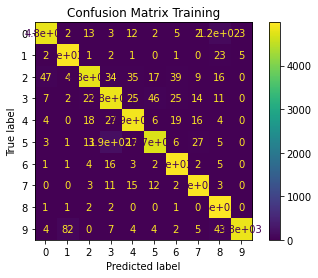

In [ ]:
confusion_matrix_tr = confusion_matrix(tr_labels, classes_tr)
ConfusionMatrixDisplay(confusion_matrix_tr, np.arange(10)).plot()
plt.title("Confusion Matrix Training")
plt.show()

## Accuracy on test set

In [ ]:
classes_ts = np.argmax(model.predict(ts_set), axis=1)
values = model.evaluate(ts_set, ts_labels_one_hot, verbose=0)
print("Test Error: {0}, Test accuracy: {1}".format(values[0], values[1]))

Test Error: 0.6948650479316711, Test accuracy: 0.8526999950408936


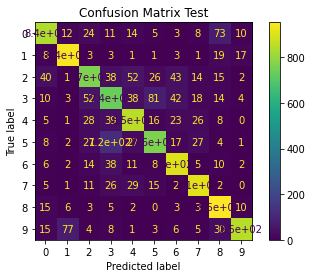

In [ ]:
confusion_matrix_ts = confusion_matrix(ts_labels, classes_ts)
ConfusionMatrixDisplay(confusion_matrix_ts, np.arange(10)).plot()
plt.rcParams["figure.figsize"] = 5.9, 5.9
plt.title("Confusion Matrix Test")
plt.show()